<font size="5">**Group9 - Citibike Rides in Jersey (10.2021) - Part B - Exploratory Data Analysis and Visualization**</font>

### Group Members
Geyao Shuai <br>
Deyoz Rayamajhi<br>
Huong Thao Nguyen<br>
Shen Min<br>
Liam Hasandjekaj<br>

**Description** <br>
For our Data Analysis module, we are pulling and analyzing a CitiBike dataset from October 2021. The data is pulled from a CSV file and then analyzed using Python package tools such as numpy, pandas, matplotlib and seaborn. The analysis includes visuaizations and comments that outline insight into our findings.

<font size="3">**Import Neccessary Packages**</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
%matplotlib inline

#!pip install haversine

import haversine as hs

<font size="3">**Loading the dataset and show the first few rows**</font>

In [2]:
citibike = pd.read_csv("JC-202110-citibike-tripdata.csv")
citibike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0FA0B0B972A68AAB,classic_bike,2021-10-19 06:08:46,2021-10-19 06:11:26,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,member
1,0702BED6EB379838,classic_bike,2021-10-16 12:08:29,2021-10-16 12:13:29,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,member
2,A8810ECCC69E2866,classic_bike,2021-10-29 12:29:49,2021-10-29 12:34:49,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,member
3,C9A0FF2B82237FFA,classic_bike,2021-10-08 12:36:21,2021-10-08 12:40:55,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,member
4,7DFDEB8EF4CAB15C,classic_bike,2021-10-14 06:54:51,2021-10-14 07:01:14,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,casual


<font size="3">**Data Preprocessing**</font>

**Pull column data types and non-null value counts**

In [3]:
citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88762 entries, 0 to 88761
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             88762 non-null  object 
 1   rideable_type       88762 non-null  object 
 2   started_at          88762 non-null  object 
 3   ended_at            88762 non-null  object 
 4   start_station_name  88762 non-null  object 
 5   start_station_id    88762 non-null  object 
 6   end_station_name    88376 non-null  object 
 7   end_station_id      88376 non-null  object 
 8   start_lat           88762 non-null  float64
 9   start_lng           88762 non-null  float64
 10  end_lat             88541 non-null  float64
 11  end_lng             88541 non-null  float64
 12  member_casual       88762 non-null  object 
dtypes: float64(4), object(9)
memory usage: 8.8+ MB


**Pull number of rows and columns**

In [4]:
citibike.shape

(88762, 13)

**Check if there are NaN/Null values in the column categories**

In [5]:
citibike.isna().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name    False
start_station_id      False
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

<font size="2">**Adding Month, Weekday, Date, Hour and Trip_Length columns**</font>

In [6]:
citibike["started_at"] = pd.to_datetime(citibike["started_at"], format="%Y-%m-%d %H:%M:%S")
citibike["ended_at"] = pd.to_datetime(citibike["ended_at"], format="%Y-%m-%d %H:%M:%S")
citibike["Started_Month"] = citibike["started_at"].dt.month
citibike["Started_Weekday"] = citibike["started_at"].dt.day_name()
citibike["Started_Day"] = citibike["started_at"].dt.day
citibike["Started_Hour"] = citibike["started_at"].dt.hour
citibike["Trip_Length"] = (citibike["ended_at"] - citibike["started_at"])
citibike["Trip_Length"] = citibike["Trip_Length"].astype('timedelta64[m]')

In [7]:
citibike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Started_Month,Started_Weekday,Started_Day,Started_Hour,Trip_Length
0,0FA0B0B972A68AAB,classic_bike,2021-10-19 06:08:46,2021-10-19 06:11:26,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,member,10,Tuesday,19,6,2.0
1,0702BED6EB379838,classic_bike,2021-10-16 12:08:29,2021-10-16 12:13:29,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,member,10,Saturday,16,12,5.0
2,A8810ECCC69E2866,classic_bike,2021-10-29 12:29:49,2021-10-29 12:34:49,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,member,10,Friday,29,12,5.0
3,C9A0FF2B82237FFA,classic_bike,2021-10-08 12:36:21,2021-10-08 12:40:55,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,member,10,Friday,8,12,4.0
4,7DFDEB8EF4CAB15C,classic_bike,2021-10-14 06:54:51,2021-10-14 07:01:14,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,casual,10,Thursday,14,6,6.0


**Using haversine formula to calculate the great-circle distance between two points**

Reference: 

https://movable-type.co.uk/scripts/latlong.html

https://towardsdatascience.com/calculating-distance-between-two-geolocations-in-python-26ad3afe287b

In [8]:
#adding start coordiate and end coordiate

citibike['start_coor'] = list(zip(citibike.start_lat, citibike.start_lng))
citibike['end_coor'] = list(zip(citibike.end_lat, citibike.end_lng))

citibike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Started_Month,Started_Weekday,Started_Day,Started_Hour,Trip_Length,start_coor,end_coor
0,0FA0B0B972A68AAB,classic_bike,2021-10-19 06:08:46,2021-10-19 06:11:26,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,member,10,Tuesday,19,6,2.0,"(40.72755146730012, -74.07106071710587)","(40.73089709786179, -74.06391263008118)"
1,0702BED6EB379838,classic_bike,2021-10-16 12:08:29,2021-10-16 12:13:29,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,member,10,Saturday,16,12,5.0,"(40.72755146730012, -74.07106071710587)","(40.73089709786179, -74.06391263008118)"
2,A8810ECCC69E2866,classic_bike,2021-10-29 12:29:49,2021-10-29 12:34:49,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,member,10,Friday,29,12,5.0,"(40.72755146730012, -74.07106071710587)","(40.73089709786179, -74.06391263008118)"
3,C9A0FF2B82237FFA,classic_bike,2021-10-08 12:36:21,2021-10-08 12:40:55,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,member,10,Friday,8,12,4.0,"(40.72755146730012, -74.07106071710587)","(40.73089709786179, -74.06391263008118)"
4,7DFDEB8EF4CAB15C,classic_bike,2021-10-14 06:54:51,2021-10-14 07:01:14,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,40.730897,-74.063913,casual,10,Thursday,14,6,6.0,"(40.72755146730012, -74.07106071710587)","(40.73089709786179, -74.06391263008118)"


In [9]:
def travel_distance(start_location,end_location):
    dist = hs.haversine(start_location,end_location)
    return round(dist,2)

In [10]:
citibike['distance'] = citibike.apply(lambda row: travel_distance(row['start_coor'],row['end_coor']), axis = 1)

In [11]:
citibike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,Started_Month,Started_Weekday,Started_Day,Started_Hour,Trip_Length,start_coor,end_coor,distance
0,0FA0B0B972A68AAB,classic_bike,2021-10-19 06:08:46,2021-10-19 06:11:26,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,...,-74.063913,member,10,Tuesday,19,6,2.0,"(40.72755146730012, -74.07106071710587)","(40.73089709786179, -74.06391263008118)",0.71
1,0702BED6EB379838,classic_bike,2021-10-16 12:08:29,2021-10-16 12:13:29,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,...,-74.063913,member,10,Saturday,16,12,5.0,"(40.72755146730012, -74.07106071710587)","(40.73089709786179, -74.06391263008118)",0.71
2,A8810ECCC69E2866,classic_bike,2021-10-29 12:29:49,2021-10-29 12:34:49,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,...,-74.063913,member,10,Friday,29,12,5.0,"(40.72755146730012, -74.07106071710587)","(40.73089709786179, -74.06391263008118)",0.71
3,C9A0FF2B82237FFA,classic_bike,2021-10-08 12:36:21,2021-10-08 12:40:55,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,...,-74.063913,member,10,Friday,8,12,4.0,"(40.72755146730012, -74.07106071710587)","(40.73089709786179, -74.06391263008118)",0.71
4,7DFDEB8EF4CAB15C,classic_bike,2021-10-14 06:54:51,2021-10-14 07:01:14,Glenwood Ave,JC094,Sip Ave,JC056,40.727551,-74.071061,...,-74.063913,casual,10,Thursday,14,6,6.0,"(40.72755146730012, -74.07106071710587)","(40.73089709786179, -74.06391263008118)",0.71


**Descriptive Statistics for Numeric/Datetime Data**

In [12]:
citibike.describe(include = 'all', datetime_is_numeric=True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,Started_Month,Started_Weekday,Started_Day,Started_Hour,Trip_Length,start_coor,end_coor,distance
count,88762,88762,88762,88762,88762,88762,88376,88376,88762.000000,88762.000000,...,88541.000000,88762,88762.0,88762,88762.000000,88762.000000,88762.000000,88762,88762,88541.000000
unique,88762,2,NaN,NaN,81,81,131,131,NaN,NaN,...,NaN,2,NaN,7,NaN,NaN,NaN,142,436,NaN
top,6F5FB57974EE7F5A,classic_bike,NaN,NaN,Grove St PATH,JC005,Grove St PATH,JC005,NaN,NaN,...,NaN,member,NaN,Friday,NaN,NaN,NaN,"(40.71958611647166, -74.04311746358871)","(40.71958611647166, -74.04311746358871)",NaN
freq,1,87924,NaN,NaN,4112,4112,4156,4156,NaN,NaN,...,NaN,54202,NaN,15892,NaN,NaN,NaN,4085,4127,NaN
mean,NaN,NaN,2021-10-16 00:09:22.259559424,2021-10-16 00:27:38.498490368,NaN,NaN,NaN,NaN,40.731946,-74.040021,...,-74.039819,NaN,10.0,NaN,15.392612,14.233737,17.778160,NaN,NaN,1.154314
min,NaN,NaN,2021-10-01 00:01:19,2021-10-01 00:06:01,NaN,NaN,NaN,NaN,40.706575,-74.086701,...,-74.090000,NaN,10.0,NaN,1.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,2021-10-08 11:56:30.249999872,2021-10-08 12:10:23.750000128,NaN,NaN,NaN,NaN,40.721124,-74.045572,...,-74.044247,NaN,10.0,NaN,8.000000,11.000000,4.000000,NaN,NaN,0.650000
50%,NaN,NaN,2021-10-15 18:45:08.500000,2021-10-15 18:58:03,NaN,NaN,NaN,NaN,40.731169,-74.037683,...,-74.037683,NaN,10.0,NaN,15.000000,15.000000,7.000000,NaN,NaN,1.020000
75%,NaN,NaN,2021-10-22 23:24:17.750000128,2021-10-23 00:04:30.249999872,NaN,NaN,NaN,NaN,40.742258,-74.031600,...,-74.030970,NaN,10.0,NaN,22.000000,18.000000,13.000000,NaN,NaN,1.550000
max,NaN,NaN,2021-10-31 23:59:38,2021-11-03 17:53:22,NaN,NaN,NaN,NaN,40.754530,-74.024020,...,-73.937648,NaN,10.0,NaN,31.000000,23.000000,10348.000000,NaN,NaN,16.450000


**Comment:**
- There are in total 88762 citibike rides in month of October 2021.
- There are 81 start_station and 131 end_station
- Two types of ride: Classic vs Docked Bike
- Average travel distance is 1.15km.
- Average travel time is 18 minutes.

**Plot the distribution of the length of Citibike Trips in October**

Text(0.5, 1.0, 'Distribution of Citibike Trip Length 10/2021')

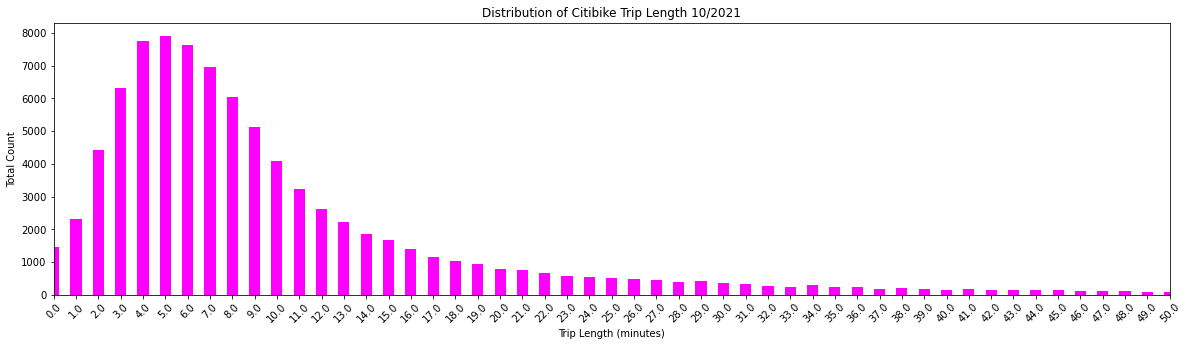

In [13]:
plt.figure(figsize = (20,5))
citibike['Trip_Length'].value_counts().sort_index().plot(kind = "bar",color="magenta")
plt.xlim(0,50)
plt.xlabel("Trip Length (minutes)")
plt.ylabel("Total Count")
plt.xticks(rotation = 45)
plt.title('Distribution of Citibike Trip Length 10/2021')

**Comment**<br>
We can see from the graph above that the vast majority of Citibike users in October 2021 spent about 1-20 minutes riding with peaks clustered between 4-7 minutes.
The graph only shows up to 50 minutes due to extreme outliers (up to 10,000 minutes). The Citibike is typically used as a quick mode of transportation between relatively near locations in NYC. The graph supports this as we see a major tappering off of trip length after ~20 minute riders.

<font size="3">**Some Quick Histograms of Relevant Numerical Data**</font>

array([[<AxesSubplot:title={'center':'started_at'}>,
        <AxesSubplot:title={'center':'ended_at'}>,
        <AxesSubplot:title={'center':'start_lat'}>],
       [<AxesSubplot:title={'center':'start_lng'}>,
        <AxesSubplot:title={'center':'end_lat'}>,
        <AxesSubplot:title={'center':'end_lng'}>],
       [<AxesSubplot:title={'center':'Started_Month'}>,
        <AxesSubplot:title={'center':'Started_Day'}>,
        <AxesSubplot:title={'center':'Started_Hour'}>],
       [<AxesSubplot:title={'center':'Trip_Length'}>,
        <AxesSubplot:title={'center':'distance'}>, <AxesSubplot:>]],
      dtype=object)

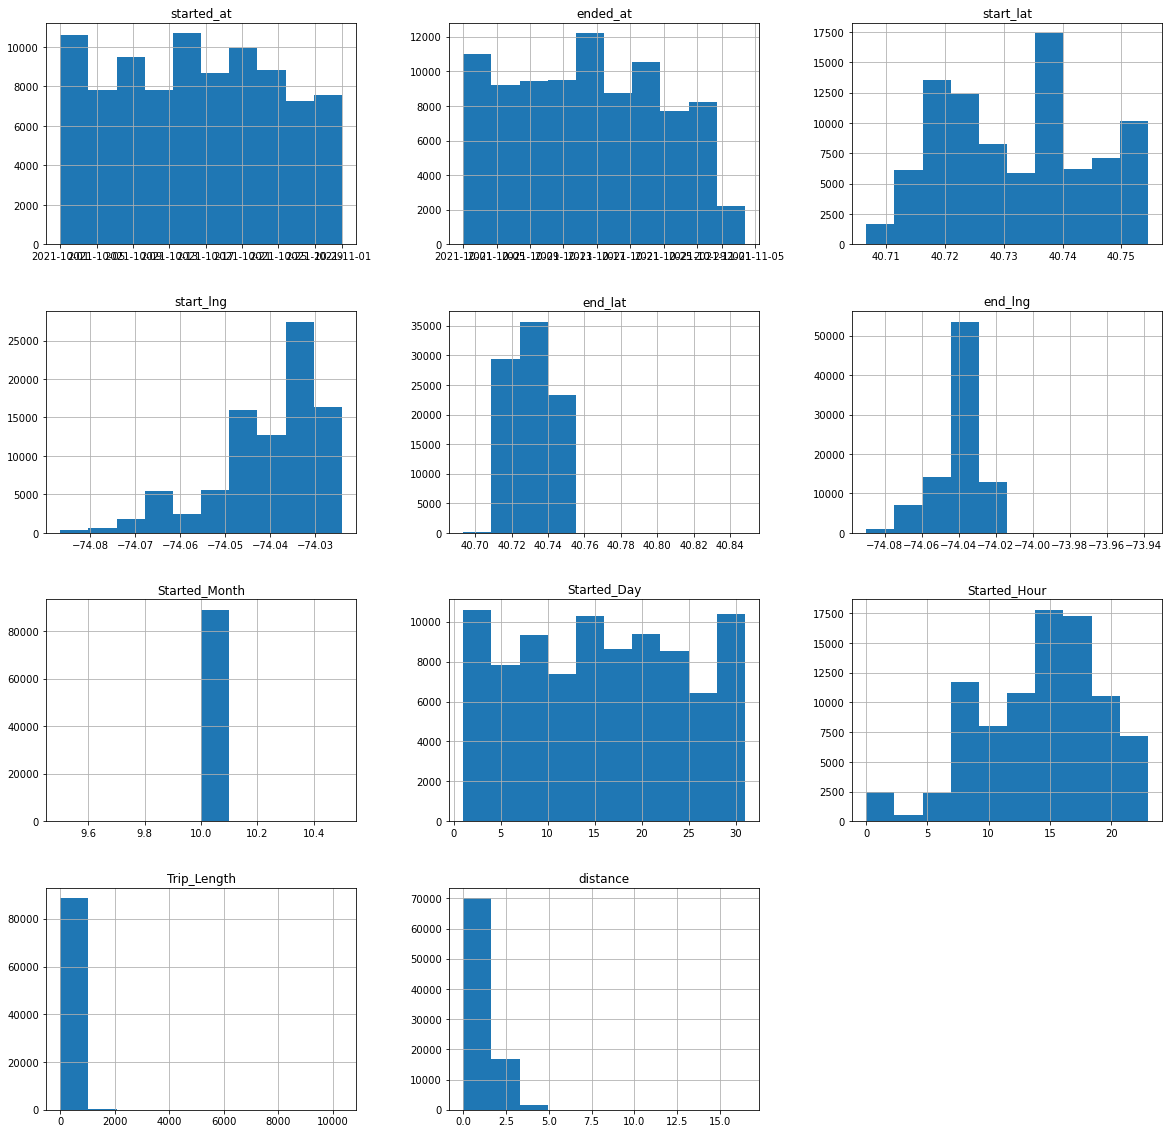

In [14]:
citibike.hist(figsize = (20,20))

<font size="3">**Data Analysis and Visualization**</font>

**Rideable Types and User Types**

Text(0.5, 1.0, 'Percentage of Docked vs Classic Bike Usage')

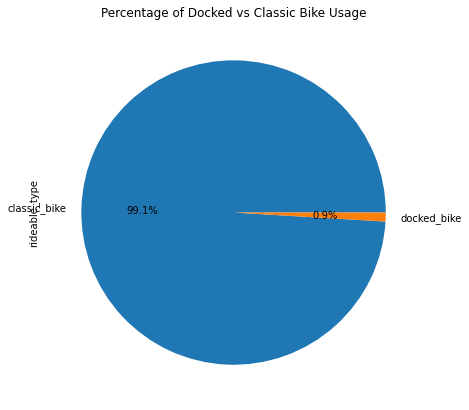

In [15]:
plt.figure(figsize = (7,7))
citibike["rideable_type"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Docked vs Classic Bike Usage')

Text(0.5, 1.0, 'Percentage Member vs Casual Users')

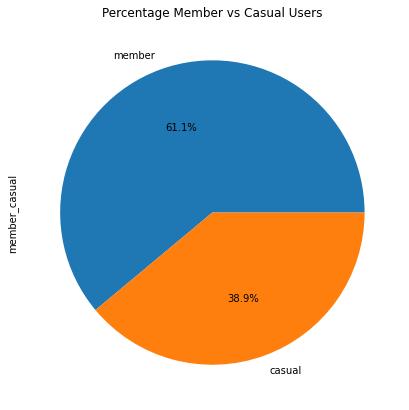

In [16]:
plt.figure(figsize = (7,7))
citibike["member_casual"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage Member vs Casual Users')

**Comment:**
 - 61% of the rides are from member, while 39% is from casual customers.
 - Majority of users use classic bike (99%), rather than docked bike.

**Ride Counts by Weekdays**

In [17]:
citibike['Started_Weekday'].value_counts().sort_values()

Monday        9414
Tuesday       9722
Wednesday    12142
Thursday     12845
Sunday       13614
Saturday     15133
Friday       15892
Name: Started_Weekday, dtype: int64

Text(0.5, 1.0, 'Citibike Rides by Weekdays')

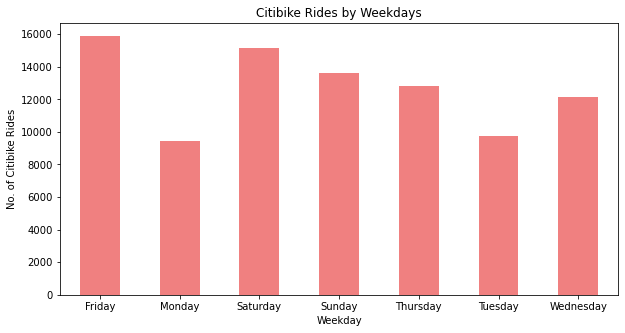

In [18]:
plt.figure(figsize = (10,5))
citibike['Started_Weekday'].value_counts().sort_index().plot(kind = "bar", color = "lightcoral")
plt.xlabel("Weekday")
plt.ylabel("No. of Citibike Rides")
plt.xticks(rotation = 0)
plt.title("Citibike Rides by Weekdays")

**Comment:**
- According to the bar plot above, Citibike rides are maximum on Friday and minimum on Monday.

**Ride Counts by Hour**

In [19]:
citibike["Started_Hour"].value_counts().sort_index()

0     1189
1      793
2      488
3      273
4      263
5      606
6     1775
7     3472
8     4741
9     3547
10    3551
11    4442
12    5442
13    5357
14    5220
15    5785
16    6770
17    8703
18    8572
19    6242
20    4325
21    3111
22    2413
23    1682
Name: Started_Hour, dtype: int64

Text(0.5, 1.0, 'Citbike Rides by Hour')

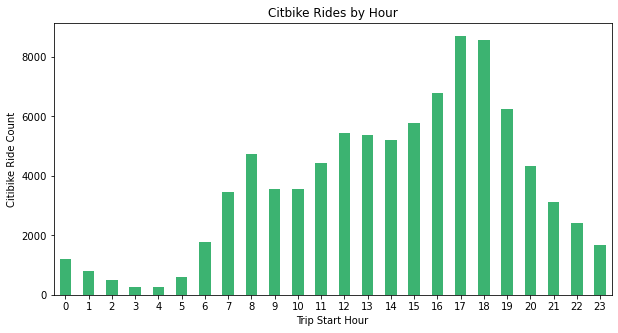

In [20]:
plt.figure(figsize = (10,5))
citibike['Started_Hour'].value_counts().sort_index().plot(kind = "bar", color = "mediumseagreen")
plt.xlabel("Trip Start Hour")
plt.ylabel("Citibike Ride Count")
plt.xticks(rotation = 0)
plt.title("Citbike Rides by Hour")

**Ride Counts by Day**

Text(0.5, 1.0, 'Citbike Rides by Days in a Month')

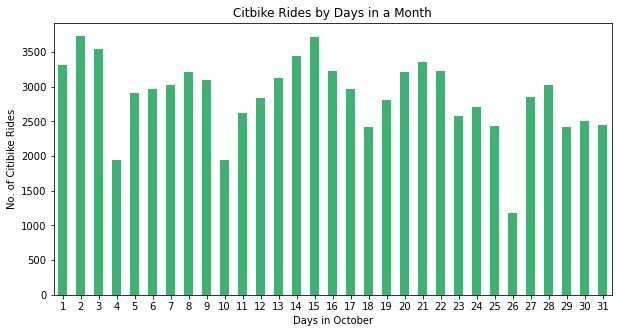

In [21]:
plt.figure(figsize = (10,5))
citibike['Started_Day'].value_counts().sort_index().plot(kind = "bar", color = "mediumseagreen")
plt.xlabel("Days in October")
plt.ylabel("No. of Citibike Rides")
plt.xticks(rotation = 0)
plt.title("Citbike Rides by Days in a Month")

**The only notable thing here is the large dip on October 26th. Perhaps something happened that day that kept people home or otherwise away from travelling around the city** 

**Total Rides Per Hour During Weekdays**

In [22]:
hour_week = citibike.groupby(['Started_Weekday','Started_Hour']).count()['started_at']
hour_week

Started_Weekday  Started_Hour
Friday           0               203
                 1                83
                 2                45
                 3                24
                 4                48
                                ... 
Wednesday        19              940
                 20              684
                 21              519
                 22              351
                 23              170
Name: started_at, Length: 168, dtype: int64

In [23]:
pivot_hour_week = hour_week.unstack()
pivot_hour_week

Started_Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Started_Weekday,,,,,,,,,,,,,,,,,,,,,
Friday,203,83,45,24,48,125,378,712,928,633,...,793,1061,1303,1646,1675,1182,772,553,521,449
Monday,80,35,22,11,28,86,233,462,673,381,...,569,624,743,968,928,685,463,321,172,101
Saturday,347,263,165,104,43,59,90,180,390,729,...,1224,1208,1136,1051,987,844,586,384,392,382
Sunday,329,299,203,96,50,25,73,114,338,542,...,1014,982,1125,1088,961,797,598,403,330,157
Thursday,105,61,22,12,30,108,373,733,899,486,...,546,644,875,1459,1442,1050,724,598,416,278
Tuesday,52,15,9,4,35,87,288,531,668,309,...,521,613,781,1129,1174,744,498,333,231,145
Wednesday,73,37,22,22,29,116,340,740,845,467,...,553,653,807,1362,1405,940,684,519,351,170


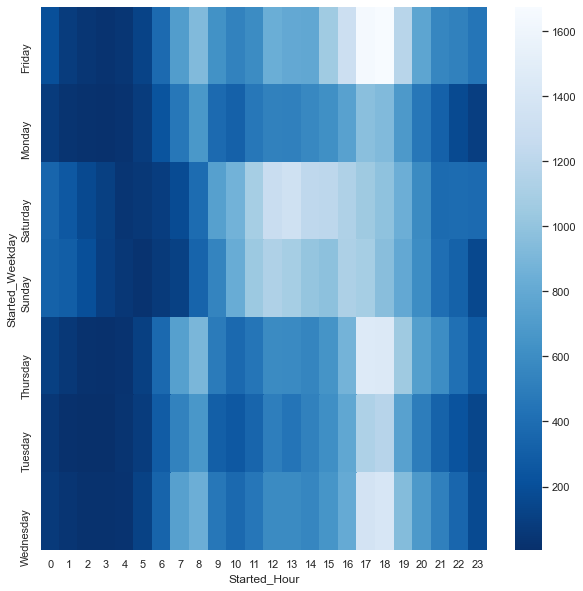

In [24]:
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
fig5=sns.heatmap(pivot_hour_week,cmap='Blues_r')

**Comment:**

The Rides by Hour bar plot and the heatmap shows that most Citibike rides occur around 5pm-7pm from Wednesday to Friday.

**Between User Types and Day in a Week**

<AxesSubplot:xlabel='Started_Weekday', ylabel='count'>

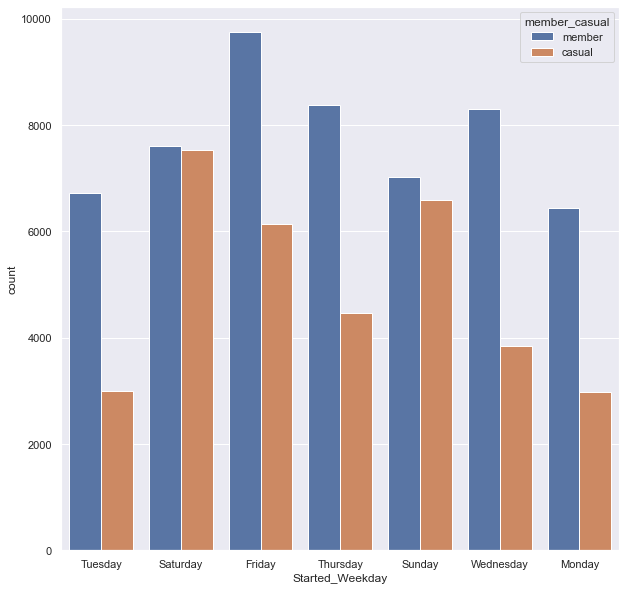

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(x = "Started_Weekday", hue = "member_casual", data = citibike)

**Comment:**
- For the weekend, we see that there is not a big difference between rides from member vs casual.
- However, for the weekday, member is the majority who take Citbike rides.

**User Types and Travel Distance:**

In [26]:
new_data = citibike.groupby(['member_casual','Started_Weekday','Started_Day','Started_Hour']).mean()['distance']
type(new_data)
new_data = new_data.to_frame()

In [27]:
new_data.head()

distance
member_casual Started_Weekday Started_Day Started_Hour          
casual        Friday          1           0             1.237692
                                          1             0.815455
                                          2             0.858000
                                          3             2.730000
                                          4             1.500000

<AxesSubplot:xlabel='distance', ylabel='Started_Weekday'>

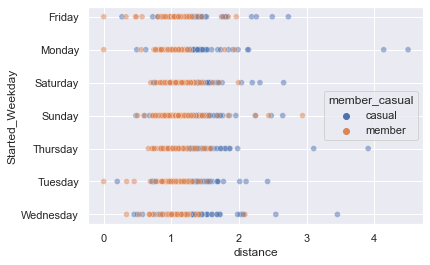

In [28]:
sns.scatterplot(x='distance', y='Started_Weekday',data=new_data, hue = "member_casual", alpha = 0.5)

In [29]:
citibike.groupby(['member_casual']).mean()['distance']

member_casual
casual    1.280519
member    1.074088
Name: distance, dtype: float64

**Comment:**
- Member shows shorter average travel distance than casual users. 

**Trip Length and User Types**

In [30]:
new_data2 = citibike.groupby(['member_casual','Started_Weekday','Started_Day','Started_Hour']).mean()['Trip_Length']
type(new_data2)
new_data2 = new_data2.to_frame()
new_data2.head()

Trip_Length
member_casual Started_Weekday Started_Day Started_Hour             
casual        Friday          1           0                7.769231
                                          1               71.363636
                                          2                6.200000
                                          3               14.571429
                                          4                6.000000

<AxesSubplot:xlabel='Started_Weekday', ylabel='Trip_Length'>

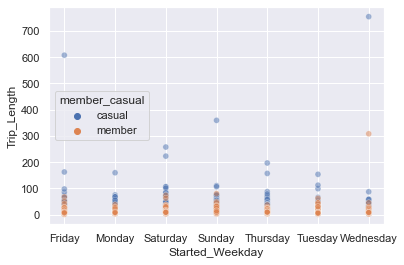

In [31]:
sns.scatterplot(x='Started_Weekday', y='Trip_Length',data=new_data2, hue = "member_casual", alpha = 0.5)

In [32]:
citibike.groupby(['member_casual']).mean()['Trip_Length']

member_casual
casual    26.692332
member    12.094351
Name: Trip_Length, dtype: float64

**Comment:**
- Casual user shows longer average trip duration than users who are member across all week days. 

**Start vs End Stations**

**Top Start Locations of the Rides**

In [33]:
ride_by_station = citibike['start_station_name'].value_counts()
ride_by_station[:5]

Grove St PATH                                   4112
Hoboken Terminal - River St & Hudson Pl         3698
South Waterfront Walkway - Sinatra Dr & 1 St    3427
Hoboken Terminal - Hudson St & Hudson Pl        3222
Newport Pkwy                                    2452
Name: start_station_name, dtype: int64

<AxesSubplot:>

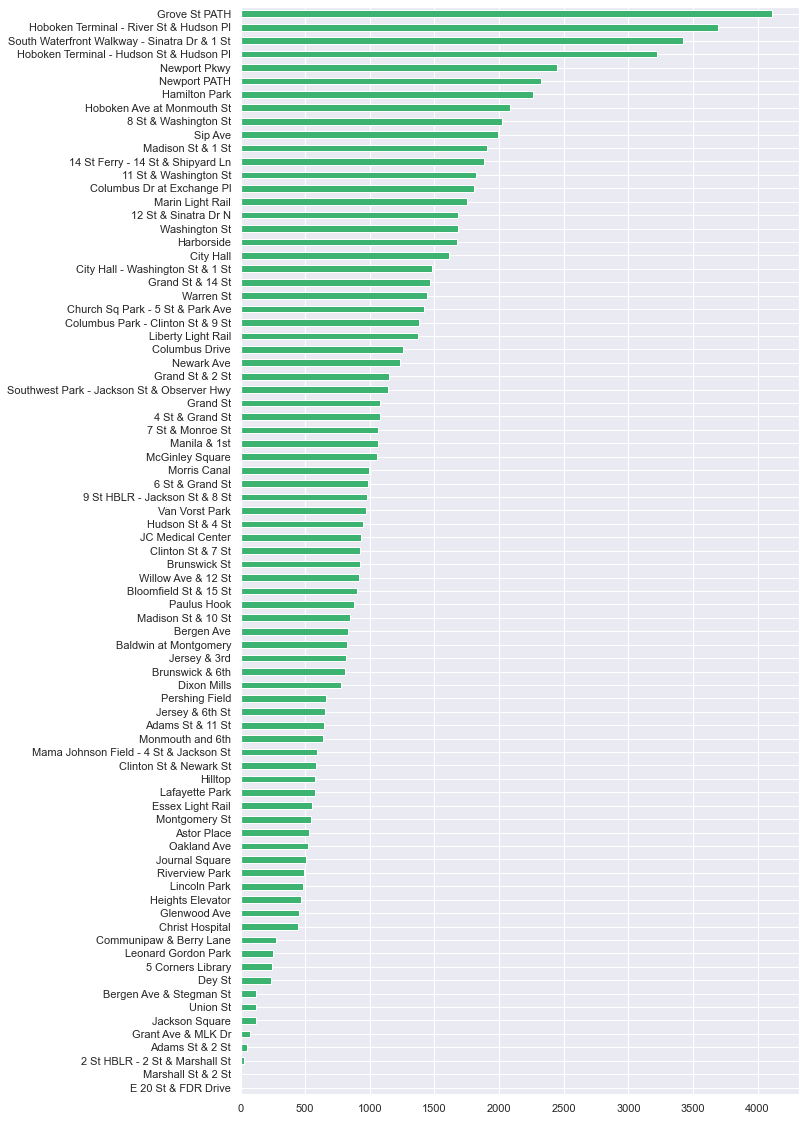

In [34]:
plt.figure(figsize = (10,20))
citibike['start_station_name'].value_counts().sort_values().plot(kind = "barh", color = "mediumseagreen")

**Comment:**
- Top three start locations with the most rides: South Waterfront Walkaway - Sinatra Dr & 1 St, Hoboken Terminal  River St & Hudson Pl, and Grove St PATH

**Top End Locations of the Rides**

In [35]:
ride_by_end_station = citibike['end_station_name'].value_counts()
ride_by_end_station[:5]

Grove St PATH                                   4156
Hoboken Terminal - River St & Hudson Pl         3679
South Waterfront Walkway - Sinatra Dr & 1 St    3447
Hoboken Terminal - Hudson St & Hudson Pl        3242
Newport Pkwy                                    2446
Name: end_station_name, dtype: int64

**Comment:**
- Top three end locations with the most rides: Grove St PATH, Hoboken Terminal - River St & Hudson Pl, and South Waterfront Walkway - Sinatra Dr & 1 St

**Scatter Plots of Citibike Coordinates**

Text(0.5, 1.0, 'Start Latitude - Start Longitude Scatter Plot')

<Figure size 1080x720 with 0 Axes>

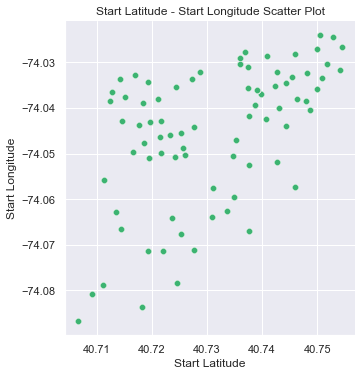

In [36]:
plt.figure(figsize=(15,10))
sns.relplot(x='start_lat',y='start_lng',alpha = 0.5, data=citibike,color='mediumseagreen')
plt.xlabel('Start Latitude')
plt.ylabel('Start Longitude')
plt.title('Start Latitude - Start Longitude Scatter Plot')

Text(0.5, 1.0, 'End Latitude - End Longitude Scatter Plot')

<Figure size 1080x720 with 0 Axes>

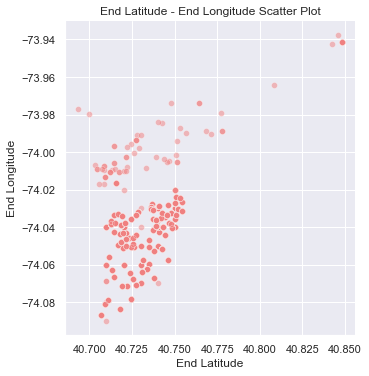

In [37]:
plt.figure(figsize=(15,10))
sns.relplot(x='end_lat',y='end_lng',alpha = 0.5,data=citibike,color='lightcoral')
plt.xlabel('End Latitude')
plt.ylabel('End Longitude')
plt.title('End Latitude - End Longitude Scatter Plot')

**Comment:**
- Most Start Stations are above -74.05 Longtitude, and most End Stations are below -74.02 longtitude and to the left of 40.75 lattitude.